In [24]:
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [25]:
data = load_breast_cancer()

print("Features: ", data.feature_names)
print("Labels: ", data.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


<b>Normalising the data

In [26]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X = normalize(X, norm='l2')

<b>Implementing KMeans (using silhouette score)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30, random_state=42)

In [28]:
model = KMeans(n_clusters=2, random_state=42)
print(f"Silhoutte score: {silhouette_score(X_train, model.fit_predict(X_train)):.4f}")

Silhoutte score: 0.4954


c:\Users\suvom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Observation: The silhouette score is approximately 0,5 which means that the clusters are not overlapping and the samples have been somewhat classified correctly using 2 clsuters only (the tumour is either benign or malignant). We must now cross-check this score by visualising the clusters.

<b>PCA for cluster visualisation

Cluster 0: the tumour is benign </br>Cluster 1: the tumour is malignant

<Axes: xlabel='PC1', ylabel='PC2'>

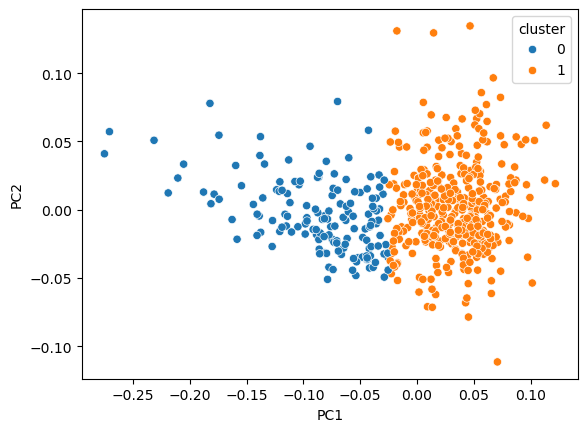

In [34]:
pca = PCA(n_components=2,random_state=42)
pca_data = pd.DataFrame(pca.fit_transform(X_train),columns=['PC1','PC2']) 
pca_data['cluster'] = pd.Categorical(model.labels_)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

In [37]:
pca.components_

array([[ 4.78912377e-02,  9.18470161e-02,  2.97956328e-01,
         6.98778688e-01,  5.06020872e-04,  2.58579561e-04,
        -6.37874739e-05, -5.81445992e-05,  9.67055713e-04,
         3.81560458e-04,  4.03166637e-04,  8.75521987e-03,
         3.40838076e-03, -6.87672869e-02,  5.63048527e-05,
         1.24325838e-04,  1.47822088e-04,  5.17643493e-05,
         1.51874627e-04,  2.62604227e-05,  4.04910883e-02,
         1.07827232e-01,  2.51619466e-01, -5.75153180e-01,
         6.27119858e-04,  2.38370789e-04, -1.46597158e-04,
        -2.77240441e-05,  1.28636374e-03,  4.15593452e-04],
       [ 7.84629788e-02,  2.59145239e-01,  4.89447532e-01,
        -4.21745967e-01,  1.34155718e-03,  1.16437345e-03,
         4.70239990e-04,  2.24453184e-05,  2.61881669e-03,
         1.02832767e-03,  3.57541314e-03,  2.25458719e-02,
         2.41008947e-02,  5.87233397e-02,  1.62864953e-04,
         4.09969725e-04,  5.31277448e-04,  1.11157582e-04,
         3.77092603e-04,  8.61919028e-05,  9.43706631e-

The result of the previous code implies that for the first component, the features mean perimeter, mean area, worst texture, worst perimeters and worst area have high importance. For the second component, the features mean texture, mean perimeter, mean area, worst texture, worst perimeters and worst area have high importance. </br>The PCA visualisation shows a clear distinction between the 2 clusters such that benign and malignant tumours are classified in their respective categories.